In [1]:
# Caminhos para a pasta de dados
import os 

# Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)

# Pasta de dados
pastaDados = r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada'
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064
['.ipynb_checkpoints', 'BR_Pais_2022.shp', 'BR_Pais_2022.shx', 'ClipBR.nc', 'limite_fpolis.shp', 'limite_fpolis.shx', 'MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'SC.csv', 'SC_Municipios_2022.shp', 'SC_Municipios_2022.shx', 'TROPESS_reanalysis_mon_t_2021.nc']
['MERRA2_HAQAST_CNN_L4_V1.20240505.nc4']


In [13]:
import xarray as xr

# Carregar o dataset de emissões de PM2,5
dataset = xr.open_dataset(pastaDados+'\\'+prefixed[0])

# Exibir informações básicas do dataset
print(dataset)

<xarray.Dataset> Size: 22MB
Dimensions:                  (time: 24, lat: 361, lon: 576)
Coordinates:
  * time                     (time) datetime64[ns] 192B 2024-05-05T00:30:00 ....
  * lat                      (lat) float32 1kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                      (lon) float32 2kB -180.0 -179.4 ... 178.8 179.4
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 20MB ...
    QFLAG                    (lat, lon) float64 2MB ...
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2024...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:                            NetCDF-4/HDF-5
    ...                                ...
    RangeEndingDate:                   2024-05-05
    Ra

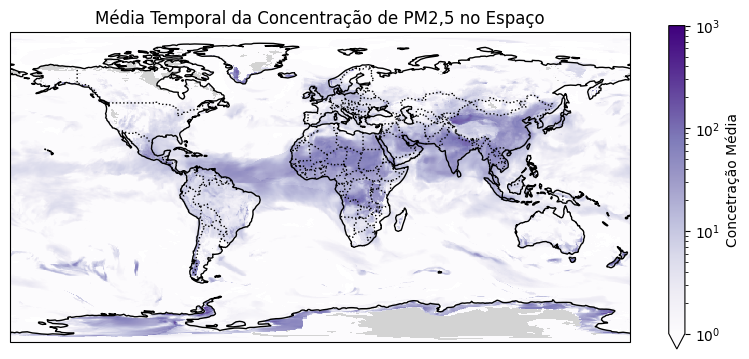

In [67]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs  # Sistema de coordenadas Cartopy
import cartopy.feature as cfeature  # Recursos como costas e fronteiras

# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados

mediatime.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', norm=norm,cbar_kwargs={'shrink':0.7,'label':'Concetração Média'})
#cbar = fig.colorbar(a, ax=ax,extend='min', shrink=0.685)

# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro
plt.title('Média Temporal da Concentração de PM2,5 no Espaço')
plt.show()

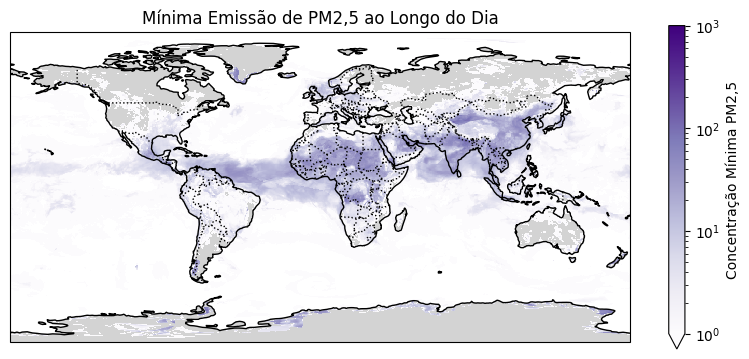

In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs  # Sistema de coordenadas Cartopy
import cartopy.feature as cfeature  # Recursos como costas e fronteiras

# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar a mínima emissão do dia (você deve substituir 'min_emission' com o nome correto do seu dado)
# Exemplo:
min_emission = dataset['MERRA2_CNN_Surface_PM25'].min(dim='time')

# Plotar os dados de mínima emissão do dia
min_emission.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', norm=norm, cbar_kwargs={'shrink': 0.7, 'label': 'Concentração Mínima PM2,5'})

# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro

# Título
plt.title('Mínima Emissão de PM2,5 ao Longo do Dia')

# Exibir o gráfico
plt.show()


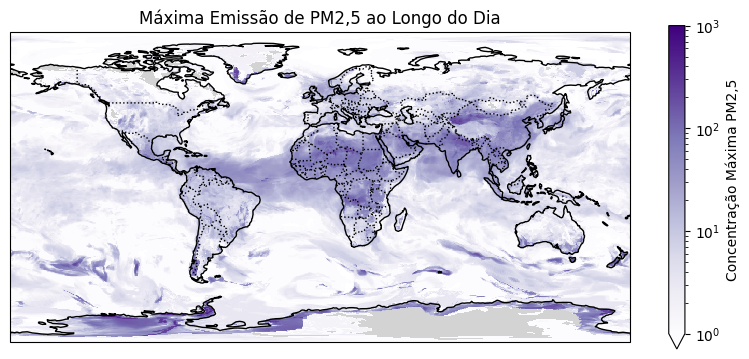

In [75]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs  # Sistema de coordenadas Cartopy
import cartopy.feature as cfeature  # Recursos como costas e fronteiras

# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar a máxima emissão do dia (você deve substituir 'max_emission' com o nome correto do seu dado)
# Exemplo:
max_emission = dataset['MERRA2_CNN_Surface_PM25'].max(dim='time')

# Plotar os dados de máxima emissão do dia
max_emission.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', norm=norm, cbar_kwargs={'shrink': 0.7, 'label': 'Concentração Máxima PM2,5'})

# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro

# Título
plt.title('Máxima Emissão de PM2,5 ao Longo do Dia')

# Exibir o gráfico
plt.show()
